In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
1,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
2,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
3,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
4,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,140.0,0.000,0.000,0.007,0.000,0.0,0.000,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2121,140.0,0.001,0.000,0.007,0.000,0.0,0.000,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.000,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2123,140.0,0.001,0.000,0.006,0.000,0.0,0.000,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
px.histogram(df, x="fetal_health", color="fetal_health",labels={"fetal_health":"Fetal Health Status"},width=800,height=800)

In [4]:
fig = px.box(df.drop(["fetal_health"],axis=1),title="Box Plot of the Dataset",width=1200,height=1200,labels={"variable":"Features"})
fig.show()

**Scalling the Data**

Using SMOTE(Synthetic Minority Oversampling Technique) to generates synthetic data for the minority class which.

In [5]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X = df.drop(["fetal_health"],axis=1)
y = df['fetal_health']

In [6]:
X_smote, y_smote = smote.fit_resample(X, y)

In [7]:
y_smote.value_counts()

1.0    1655
3.0    1655
2.0    1655
Name: fetal_health, dtype: int64

In [8]:
#New dataset after over-sampeling the minority class
df_new = X_smote.assign(status = y_smote)
df_new

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,status
0,132.000000,0.006000,0.000000,0.006000,0.003000,0.0,0.000000,17.000000,2.100000,0.000000,...,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.0,1.0
1,133.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.100000,0.000000,...,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.0,1.0
2,134.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.0,1.0
3,132.000000,0.007000,0.000000,0.008000,0.000000,0.0,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.0,1.0
4,134.000000,0.001000,0.000000,0.010000,0.009000,0.0,0.002000,26.000000,5.900000,0.000000,...,50.000000,200.000000,5.000000,3.000000,76.000000,107.000000,107.000000,170.000000,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,110.000000,0.002008,0.002992,0.002042,0.008983,0.0,0.002000,68.000000,3.198326,0.000000,...,62.974888,187.050223,6.000000,0.991629,91.000000,78.050223,94.000000,39.050223,-1.0,3.0
4961,144.000000,0.000000,0.001885,0.001885,0.000000,0.0,0.000000,83.885338,0.300000,31.000000,...,132.000000,170.000000,2.000000,0.000000,144.000000,143.114662,145.000000,0.000000,-1.0,3.0
4962,133.833051,0.001000,0.000042,0.012958,0.008083,0.0,0.002917,30.377329,6.128877,0.000000,...,50.000000,200.459110,6.125212,2.874788,70.540890,106.248730,106.292161,216.460804,0.0,3.0
4963,134.000000,0.002801,0.000398,0.000000,0.000398,0.0,0.004801,63.801126,1.660225,0.000000,...,66.994372,178.210130,5.602251,1.000000,88.198874,101.795498,102.596623,84.818008,-1.0,3.0


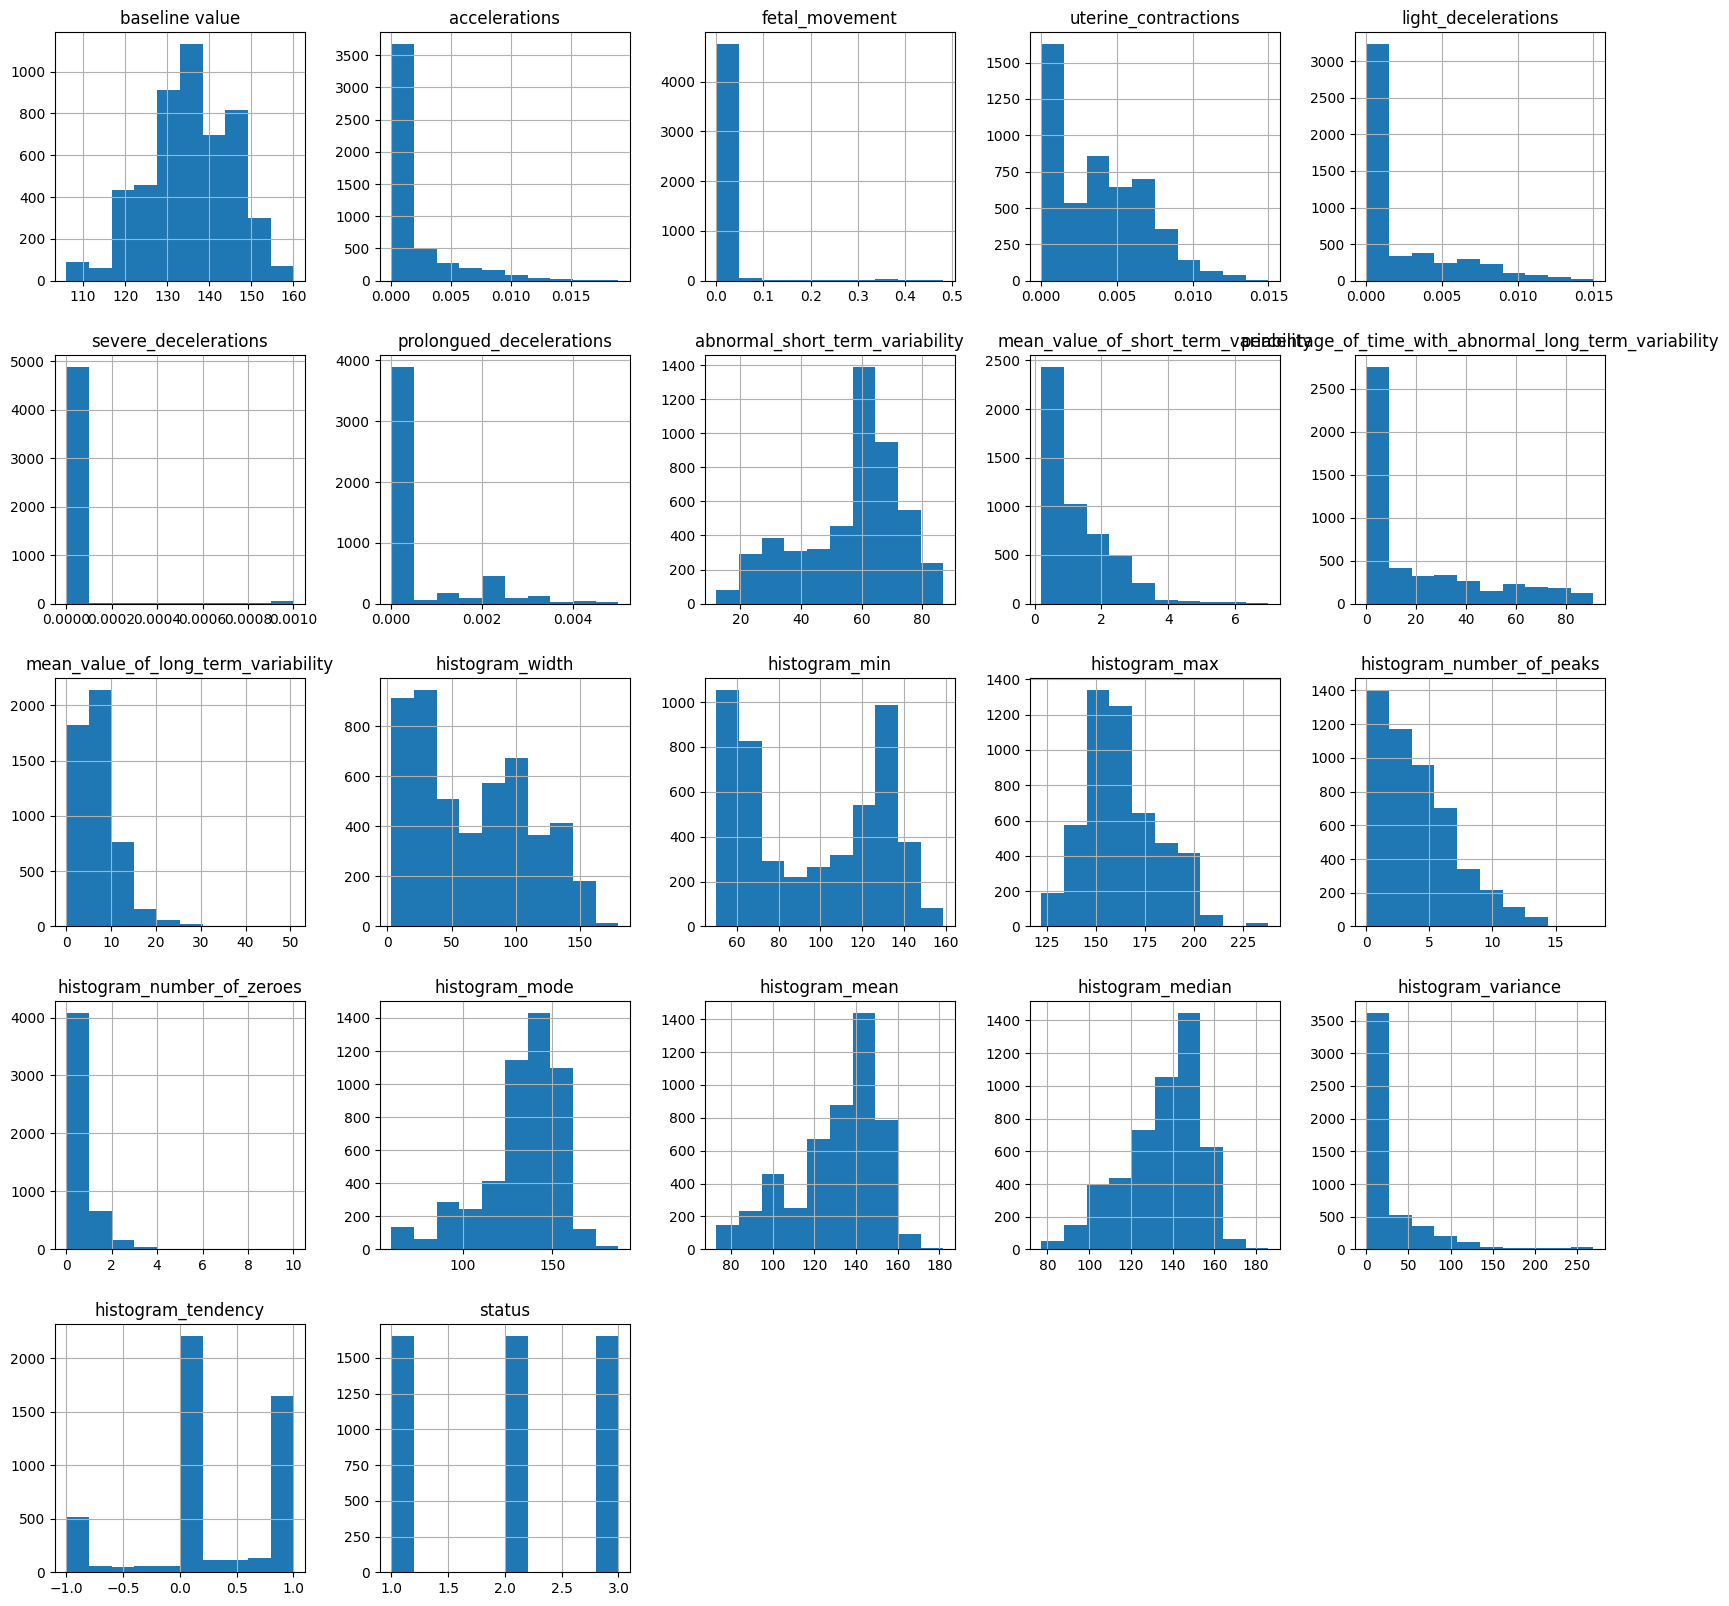

In [9]:
# Evaluating distributions of the features 
hist_plot = df_new.hist(figsize = (20,20))

**Feature Selectiion using correlation**


In [10]:
# Examining correlation matrix using heatmap
df_corr = df_new.corr()
fig = px.imshow(df_corr,
                x = df_corr.columns,
                y = df_corr.columns,
                title = 'Correlation Matrix',
                labels = dict(x="Features", y="Features", color="corelation"),
                height = 2000,
                width = 2000,
                text_auto=True)
fig.update_yaxes()
fig.show()

In [11]:
corr_matrix = df_new.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

df_new.drop(to_drop, axis=1, inplace=True)


In [12]:
df_new.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_variance',
       'histogram_tendency', 'status'],
      dtype='object')

In [13]:
df_new

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,status
0,132.000000,0.006000,0.000000,0.006000,0.003000,0.0,0.000000,17.000000,2.100000,0.000000,10.400000,130.000000,68.000000,198.000000,6.000000,1.000000,141.000000,12.000000,0.0,1.0
1,133.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.100000,0.000000,13.400000,130.000000,68.000000,198.000000,5.000000,1.000000,141.000000,13.000000,0.0,1.0
2,134.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.400000,0.000000,23.000000,117.000000,53.000000,170.000000,11.000000,0.000000,137.000000,13.000000,1.0,1.0
3,132.000000,0.007000,0.000000,0.008000,0.000000,0.0,0.000000,16.000000,2.400000,0.000000,19.900000,117.000000,53.000000,170.000000,9.000000,0.000000,137.000000,11.000000,1.0,1.0
4,134.000000,0.001000,0.000000,0.010000,0.009000,0.0,0.002000,26.000000,5.900000,0.000000,0.000000,150.000000,50.000000,200.000000,5.000000,3.000000,76.000000,170.000000,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,110.000000,0.002008,0.002992,0.002042,0.008983,0.0,0.002000,68.000000,3.198326,0.000000,0.000000,124.075335,62.974888,187.050223,6.000000,0.991629,91.000000,39.050223,-1.0,3.0
4961,144.000000,0.000000,0.001885,0.001885,0.000000,0.0,0.000000,83.885338,0.300000,31.000000,5.711466,38.000000,132.000000,170.000000,2.000000,0.000000,144.000000,0.000000,-1.0,3.0
4962,133.833051,0.001000,0.000042,0.012958,0.008083,0.0,0.002917,30.377329,6.128877,0.000000,0.000000,150.459110,50.000000,200.459110,6.125212,2.874788,70.540890,216.460804,0.0,3.0
4963,134.000000,0.002801,0.000398,0.000000,0.000398,0.0,0.004801,63.801126,1.660225,0.000000,0.000000,111.215757,66.994372,178.210130,5.602251,1.000000,88.198874,84.818008,-1.0,3.0


**Scaling the Data**

In [14]:
X= df_new.drop(["status"],axis=1)
y= df_new["status"]

In [15]:
col_names = list(X.columns)
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   

In [16]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,4965.0,-1.992096e-15,1.000101,-2.929581,-0.624183,-0.083783,0.803246,2.483093
accelerations,4965.0,-4.579530e-17,1.000101,-0.526563,-0.526563,-0.526563,0.148936,5.890674
fetal_movement,4965.0,5.724413e-18,1.000101,-0.240578,-0.240578,-0.224056,-0.164745,8.878329
uterine_contractions,4965.0,-1.602836e-16,1.000101,-1.176538,-0.949242,-0.145026,0.758740,3.661657
light_decelerations,4965.0,-1.144883e-17,1.000101,-0.640560,-0.640560,-0.640560,0.290599,4.015235
severe_decelerations,4965.0,-1.144883e-17,1.000101,-0.121542,-0.121542,-0.121542,-0.121542,9.370117
prolongued_decelerations,4965.0,0.000000e+00,1.000101,-0.479529,-0.479529,-0.479529,-0.479529,4.668870
abnormal_short_term_variability,4965.0,2.747718e-16,1.000101,-2.679907,-0.632419,0.270884,0.632829,1.836610
mean_value_of_short_term_variability,4965.0,1.130572e-16,1.000101,-1.024628,-0.822055,-0.315623,0.595955,5.862849
percentage_of_time_with_abnormal_long_term_variability,4965.0,0.000000e+00,1.000101,-0.749755,-0.749755,-0.555170,0.532851,2.791693


In [17]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [18]:
X_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency
4078,-0.370424,-0.526563,4.260195,-0.274224,0.062720,-0.121542,1.579831,0.270884,0.804939,-0.749755,0.711408,1.258999,-1.180099,0.864492,1.696962,-0.447898,-0.039134,0.825941,-0.391685
1650,-0.323479,1.837682,-0.240578,2.048925,2.773690,-0.121542,-0.479529,-0.030217,1.608819,-0.749755,-1.356284,1.124347,-0.789535,1.246729,0.334852,-0.447898,-1.211746,2.046738,-1.976119
4231,-1.272139,-0.526563,-0.225778,0.396678,2.463303,7.287908,-0.479529,0.532353,1.366423,-0.749755,-0.359109,0.797430,-1.169538,-0.210381,0.848619,-0.447898,-2.924199,2.050644,-1.628537
112,-0.624183,-0.526563,-0.183703,0.758740,-0.640560,-0.121542,-0.479529,-1.114181,-0.011764,-0.749755,1.138642,-0.293991,0.448270,0.108256,0.005779,0.974974,-0.012713,-0.532200,-0.391685
4962,-0.139743,-0.188813,-0.239786,3.003102,1.868440,-0.121542,2.523558,-1.573220,4.980520,-0.749755,-1.356284,1.912648,-1.393343,2.030600,0.705129,3.642556,-2.786437,4.450514,-0.391685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,-0.195917,-0.526563,-0.220586,0.811502,0.476766,-0.121542,1.579831,0.324537,0.735901,-0.749755,-0.563699,0.873954,-1.099670,0.096432,0.077551,-0.292729,-0.261392,1.082326,-0.391685
466,0.879338,-0.526563,-0.202661,-0.531446,-0.640560,-0.121542,-0.479529,1.655949,-0.923341,0.456672,-0.218598,-0.660013,1.082268,0.379321,-0.652368,-0.447898,0.475782,-0.578668,-1.976119
3092,0.561032,-0.248124,0.072003,-0.570786,-0.384680,-0.121542,-0.479529,-0.178268,-0.560690,-0.095000,0.250397,-0.374672,0.766079,0.487747,-0.167583,-0.447898,0.896473,-0.428272,-0.391685
3772,-1.325826,-0.526563,-0.240578,-0.363163,-0.640560,-0.121542,-0.479529,1.718787,-0.826457,-0.534866,1.045793,0.026279,-1.031058,-1.789199,-1.138827,-0.447898,-0.501208,-0.533210,1.192748


In [19]:
y_train

4078    3.0
1650    1.0
4231    3.0
112     1.0
4962    3.0
       ... 
4426    3.0
466     3.0
3092    2.0
3772    3.0
860     1.0
Name: status, Length: 3475, dtype: float64

**Selecting the best model applying cross validation and Hyperparameter tuning**

In [20]:
models = [
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [25, 50, 100, 150],
        'max_depth': [3, 5, 7, 9],
        'min_samples_leaf': [3, 5, 10, 15, 20],
        'min_samples_split': [8, 10, 12, 18, 20],
        'criterion': ['gini', 'entropy'],
        'n_jobs': [-1],
    }),
    ('SVM', svm.SVC(), {
        'C': [0.1, 1, 10, 20, 30],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    ('Gradient Boosting', GradientBoostingClassifier(), {
        'n_estimators': np.arange(50, 201, 10),
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.1, 0.5, 1.0]
    }),
    ('Decision Tree', DecisionTreeClassifier(),{
        'max_depth':np.arange(3,16,2),
        'min_samples_leaf':[3,5,10,15,20],
        'min_samples_split':[8,10,12,18,20,16],
        'criterion':['gini','entropy']
    }),
    ('KNN', KNeighborsClassifier(), {
        'n_neighbors': np.arange(2, 21, 2),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [5, 10, 15, 20, 25],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
    }),
    ('Logistic Regression', LogisticRegression(), {
        'penalty': ['l1', 'l2'],
        'C': [100, 10, 1.0, 0.1, 0.01],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 500, 1000],
        'random_state': [42],
    })
]

In [21]:
import joblib

best_accuracy = 0.0

for model_name, model, param_grid in models:

    grid_search = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

    grid_search.fit(X_train, y_train)

    print(f"Best hyperparameters for {model_name}:", grid_search.best_params_)
    
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)

    print(classification_report(y_test, y_pred))

    test_accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Test accuracy of the best {model_name} model:", test_accuracy)

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model_name = model_name
        final_model = best_model

print(f"The {best_model_name} model is the best model...")
best_model_filename = 'final_model.joblib'
joblib.dump(final_model, best_model_filename)
joblib.dump(scaler,"scaler.joblib")

Best hyperparameters for Random Forest: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 150, 'n_jobs': -1}
              precision    recall  f1-score   support

         1.0       0.99      0.94      0.96       527
         2.0       0.92      0.97      0.94       474
         3.0       0.98      0.98      0.98       489

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.96      1490

Test accuracy of the best Random Forest model: 0.961744966442953
Best hyperparameters for SVM: {'C': 30, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

         1.0       0.99      0.94      0.97       527
         2.0       0.94      0.99      0.96       474
         3.0       0.99      0.99      0.99       489

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97 

['scaler.joblib']

In [22]:
final_model

KNeighborsClassifier(leaf_size=5, metric='manhattan', n_neighbors=2,
                     weights='distance')